In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import pydot

In [13]:
sin_wave = np.array([math.sin(x) for x in np.arange(2000)])
sin5_wave = np.array([math.sin(5*x) for x in np.arange(2000)])

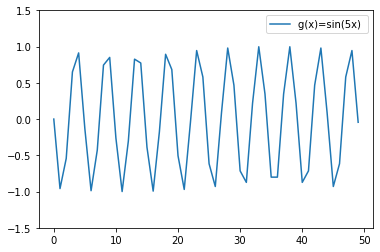

<Figure size 432x288 with 0 Axes>

In [14]:
plt.plot(sin5_wave[:50], label='g(x)=sin(5x) ')
plt.ylim(-1.5,1.5)
plt.legend();
plt.show()
plt.clf()

In [15]:
X = []
Y = []

seq_len = 50
num_records = len(sin_wave)-seq_len

for i in range(num_records-50):
    X.append(sin_wave[i:i+seq_len])
    Y.append(np.array([1, 0]))
    X.append(sin5_wave[i:i+seq_len])
    Y.append(np.array([0, 1]))
    
X = np.array(X)
X = np.expand_dims(X, axis=2)

Y = np.array(Y)

In [16]:
X.shape, Y.shape

((3800, 50, 1), (3800, 2))

In [64]:
new_weights = np.ones((1,50))
new_weights = np.array(new_weights)
new_weights = np.expand_dims(new_weights, axis=1)

model = keras.Sequential()
inp = keras.Input((50, 1), name='input')
dens = layers.Dense(50, name='dense', use_bias=False,
                   trainable=False)(inp)
rnn = layers.SimpleRNN(2, name='rnn', use_bias=False,
                      return_sequences=False)(dens)
dens2 = layers.SimpleRNN(100, name='dense2', use_bias=False,
                       activation='sigmoid')(dens)

con = layers.concatenate([rnn,dens2])

dens3 = layers.Dense(2, name='dense3', use_bias=False,
                    trainable=False)(con)
model = keras.Model(inputs=[inp], outputs=[dens3])


model.layers[1].set_weights(new_weights)
model.layers[-1].set_weights(np.ones((1, 102, 2)))
model.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
model.summary()

Model: "functional_37"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input (InputLayer)              [(None, 50, 1)]      0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 50, 50)       50          input[0][0]                      
__________________________________________________________________________________________________
rnn (SimpleRNN)                 (None, 2)            104         dense[0][0]                      
__________________________________________________________________________________________________
dense2 (SimpleRNN)              (None, 100)          15000       dense[0][0]                      
______________________________________________________________________________________

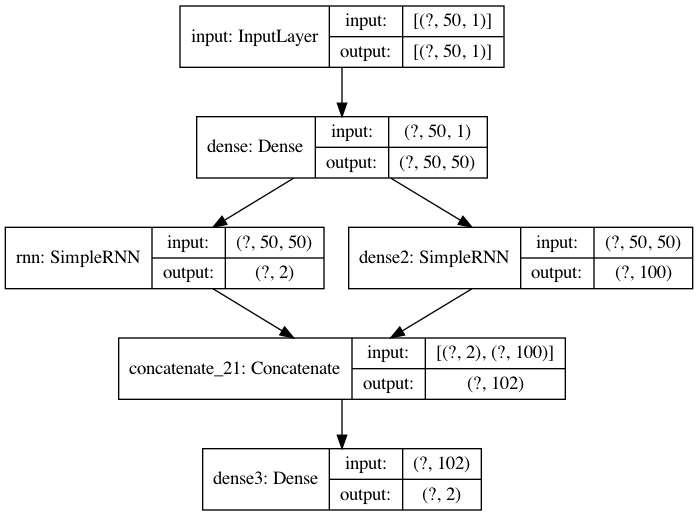

In [66]:
keras.utils.plot_model(model, show_shapes=True)

In [67]:
history = model.fit(X, Y, epochs=25, verbose=1)

Epoch 1/25
119/119 [==============================] - 1s 9ms/step - loss: 831.0026
Epoch 2/25
119/119 [==============================] - 1s 8ms/step - loss: 10.2837
Epoch 3/25
119/119 [==============================] - 1s 8ms/step - loss: 4.1812
Epoch 4/25
119/119 [==============================] - 1s 8ms/step - loss: 2.5778
Epoch 5/25
119/119 [==============================] - 1s 8ms/step - loss: 1.7903
Epoch 6/25
119/119 [==============================] - 1s 8ms/step - loss: 1.3361
Epoch 7/25
119/119 [==============================] - 1s 8ms/step - loss: 1.0491
Epoch 8/25
119/119 [==============================] - 1s 8ms/step - loss: 0.8547
Epoch 9/25
119/119 [==============================] - 1s 8ms/step - loss: 0.7175
Epoch 10/25
119/119 [==============================] - 1s 8ms/step - loss: 0.6173
Epoch 11/25
119/119 [==============================] - 1s 8ms/step - loss: 0.5422
Epoch 12/25
119/119 [==============================] - 1s 8ms/step - loss: 0.4849
Epoch 13/25
119/119 [=

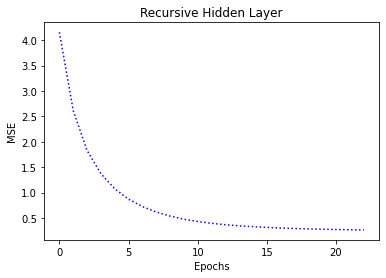

<Figure size 432x288 with 0 Axes>

In [63]:
plt.plot(history.history['loss'][2:], ':b', label='MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.title('Recursive Hidden Layer')
plt.savefig('/Users/austinschladant/Anaconda/Project2/CompFunOutMSE.png'.format(i), dpi=600)
plt.show()
plt.clf()

In [14]:
for i in range(len(history.history['loss'])):
    plt.plot(history.history['loss'][: i], ':b', label='MSE')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0,0.5)
    plt.xlim(0,25)
    plt.title('Recursive Outer Layer')
    plt.savefig('/Users/austinschladant/Anaconda/Project2/CompFunOutMSE{}.png'.format(i), dpi=600)
    plt.clf()
    

<Figure size 432x288 with 0 Axes>

In [12]:
X_val = []
Y_val = []

for i in range(num_records - 50, num_records):
    X_val.append(sin_wave[i:i+seq_len])
    Y_val.append(np.array([1, 0]))
    X_val.append(sin5_wave[i:i+seq_len])
    Y_val.append(np.array([0, 1]))
    
X_val = np.array(X_val)
X_val = np.expand_dims(X_val, axis=2)

Y_val = np.array(Y_val)

In [13]:
test_output = model.predict(X_val, verbose=1)

MSE = round(mean_squared_error(Y_val[:, 0], test_output[:, 0]),4)
print(MSE)

4/4 [==============================] - 0s 2ms/step
0.2506
